# Rachelle Atchina -- Fires in Pittsburgh #

#### Certain Neighborhoods in Pittsbrgh experince a **LOT** more fires than others. ####
#### Fire related deaths have climbed steadly over the past 10 years with 13 deaths per million people in the US. (2022 According to usfa FEMA) ####

*https://www.usfa.fema.gov/statistics/deaths-injuries/*

#### All csv files and data can be found at ####
*https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh* 

#### The data used is from 2020. ####

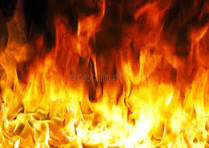

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
fires = pd.read_csv("Fires.csv")
fires.head(10)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,9,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",1,2018-03-15T20:39:05,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,10,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",0,2017-06-03T01:31:13,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


#### First, I wanted to sort the different neighborhoods and count how many fires they have had. Some of the data had NaN as their neighborhood, so I excluded that data as it would not be helpful. ####

In [8]:
counts = fires["neighborhood"].value_counts(dropna=True)
print(counts)

neighborhood
Carrick                      307
Central Business District    290
South Side Flats             289
Squirrel Hill South          268
Hazelwood                    257
                            ... 
Ridgemont                     12
Mt. Oliver                    12
East Carnegie                 11
Regent Square                  9
Mount Oliver Borough           6
Name: count, Length: 91, dtype: int64


#### Next I filtered based on areas that had less than 40 fires, and got our top 25 best neighborhoods on fires. ####

In [12]:
filtered_counts = counts[counts < 40]
print(filtered_counts)

neighborhood
Polish Hill             39
Morningside             35
Friendship              33
Westwood                28
Spring Garden           26
South Shore             26
Fairywood               26
Windgap                 24
Hays                    24
Esplen                  23
West End                23
New Homestead           22
Bon Air                 22
Summer Hill             21
Glen Hazel              20
Chartiers City          18
Swisshelm Park          17
St. Clair               14
Arlington Heights       13
Oakwood                 13
Ridgemont               12
Mt. Oliver              12
East Carnegie           11
Regent Square            9
Mount Oliver Borough     6
Name: count, dtype: int64


#### Next, I wanted to create a graph displaying the top neighborhoods on safety from fires. ####

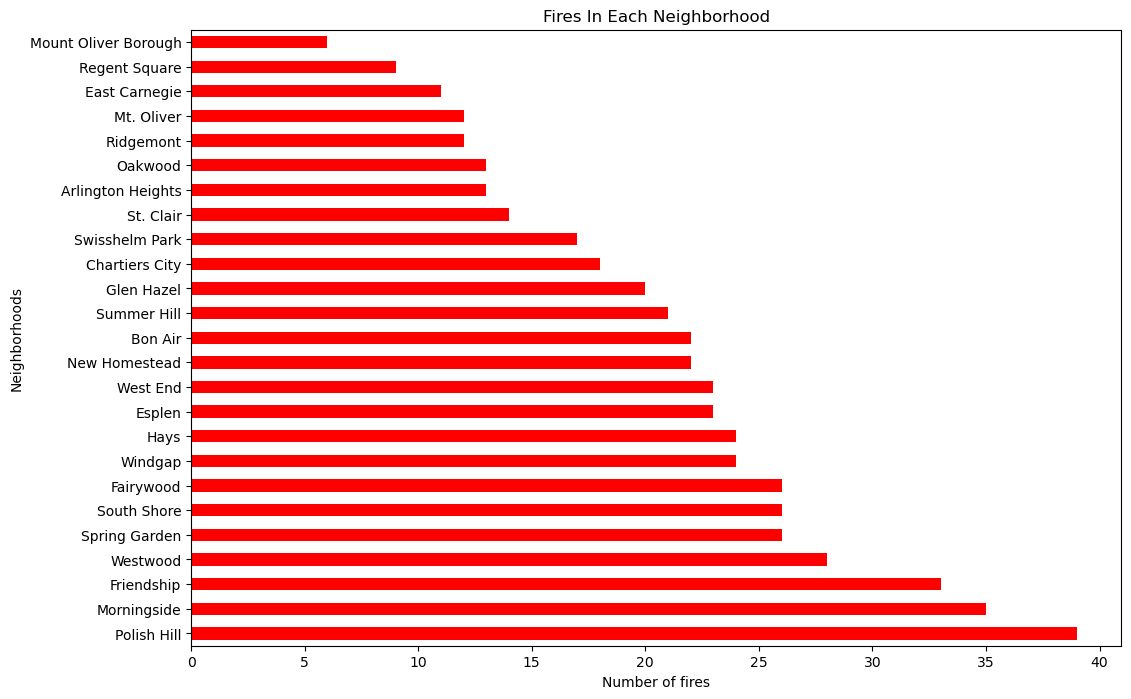

In [285]:
filtered_counts.plot(kind = "barh", x= 'fires', y = 'neighborhood', color = 'red')
plt.xlabel("Number of fires")
plt.ylabel("Neighborhoods")
plt.title("Fires In Each Neighborhood")
plt.show()

#### And just because it is visually appealing I wanted to create a map version so we could easily see where the best, safest from a fire, location is in Pittsburgh! #### 
1. First I clean up the dataset so it is just the neighborhoods and the longitude and latitude.

In [287]:
fires_cleaned = fires[['neighborhood', 'latitude', 'longitude']]
fires_cleaned.head()

,neighborhood,latitude,longitude
0,NaN,40.441275,-79.882485
1,NaN,40.436342,-79.881003
2,NaN,NaN,NaN
3,Fineview,40.460303,-80.006980
4,Fairywood,40.449009,-80.076607


#### You need geopandas to do these types of graphs so I load that in ####

In [298]:
import geopandas as gpd
import matplotlib.pyplot as plt
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

In [296]:
# Clean fires data
fires_cleaned = fires_cleaned.dropna(subset=['longitude', 'latitude'])

# Create a GeoDataFrame for fires
gdf_fires = gpd.GeoDataFrame(
    fires_cleaned,
    geometry=gpd.points_from_xy(fires_cleaned['longitude'], fires_cleaned['latitude']),
    crs="EPSG:4326"
)

In [294]:
# Count fires by neighborhood
fire_counts = fires_cleaned.groupby('neighborhood').size().reset_index(name='number_of_fires')

# Merge fire counts into neighborhoods
fire_map = neighborhoods.merge(fire_counts, how='left', left_on='hood', right_on='neighborhood')

# Inspect the result
fire_map[['hood', 'number_of_fires', 'geometry']].head()

,hood,number_of_fires,geometry
0,Central Oakland,98,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,133,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,64,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,114,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,75,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


In [118]:
fires_cleaned = fires_cleaned.dropna(subset=['longitude', 'latitude'])
gdf = gpd.GeoDataFrame(
    fires_cleaned,
    geometry=gpd.points_from_xy(fires_cleaned['longitude'], fires_cleaned['latitude']),
    crs="EPSG:4326"
)

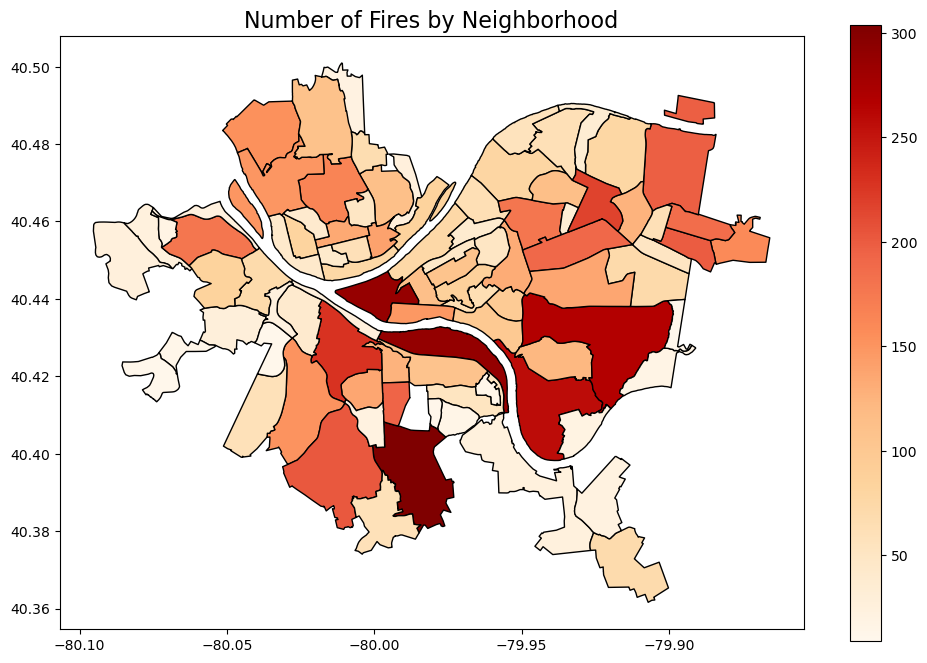

In [269]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
fire_map.plot(
    column='number_of_fires', 
    cmap='OrRd',
    legend=True,
    edgecolor='black'
)
plt.title("Number of Fires by Neighborhood", fontsize=16)
plt.show()